In [1]:
from collections import Counter
import re
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]


Saving stroke_prediction_dataset.csv to stroke_prediction_dataset.csv


In [2]:
df = pd.read_csv("/stroke_prediction_dataset.csv")

#Cleaning Column Names
df.columns = (
    df.columns.str.strip()
              .str.lower()
              .str.replace(' ', '_', regex=False)
              .str.replace('/', '_', regex=False)
              .str.replace('-', '_', regex=False)
)
print(" Cleaned column names:", df.columns.tolist())

 Cleaned column names: ['patient_id', 'patient_name', 'age', 'gender', 'hypertension', 'heart_disease', 'marital_status', 'work_type', 'residence_type', 'average_glucose_level', 'body_mass_index_(bmi)', 'smoking_status', 'alcohol_intake', 'physical_activity', 'stroke_history', 'family_history_of_stroke', 'dietary_habits', 'stress_levels', 'blood_pressure_levels', 'cholesterol_levels', 'symptoms', 'diagnosis']


In [3]:
#Extracting Blood Pressure Levels
if 'blood_pressure_levels' in df.columns:
    bp = df['blood_pressure_levels'].astype(str).str.extract(r'(\d+)\D+(\d+)', expand=True)
    df['systolic_bp'] = pd.to_numeric(bp[0], errors='coerce')
    df['diastolic_bp'] = pd.to_numeric(bp[1], errors='coerce')

In [4]:
#Extracting Cholesterol Levels
if 'cholesterol_levels' in df.columns:
    hdl = df['cholesterol_levels'].astype(str).str.extract(r'HDL[:\s]*?(\d+)', expand=False)
    ldl = df['cholesterol_levels'].astype(str).str.extract(r'LDL[:\s]*?(\d+)', expand=False)
    df['hdl'] = pd.to_numeric(hdl, errors='coerce')
    df['ldl'] = pd.to_numeric(ldl, errors='coerce')

In [7]:
#Dropping old features
df.drop(columns = ['blood_pressure_levels', 'cholesterol_levels'], inplace = True)

In [8]:
#Displaying the dataset
print("\n Dataset after feature engineering (without encoding categorical variables):")
df.head()


 Dataset after feature engineering (without encoding categorical variables):


,patient_id,patient_name,age,gender,hypertension,heart_disease,marital_status,work_type,residence_type,average_glucose_level,...,stroke_history,family_history_of_stroke,dietary_habits,stress_levels,symptoms,diagnosis,systolic_bp,diastolic_bp,hdl,ldl
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,0,Yes,Vegan,3.48,"Difficulty Speaking, Headache",Stroke,140,108,68,133
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,0,No,Paleo,1.73,"Loss of Balance, Headache, Dizziness, Confusion",Stroke,146,91,63,70
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,0,Yes,Paleo,7.31,"Seizures, Dizziness",Stroke,154,97,59,95
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,0,No,Paleo,5.35,"Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke,174,81,70,137
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,0,Yes,Pescatarian,6.84,Difficulty Speaking,Stroke,121,95,65,68


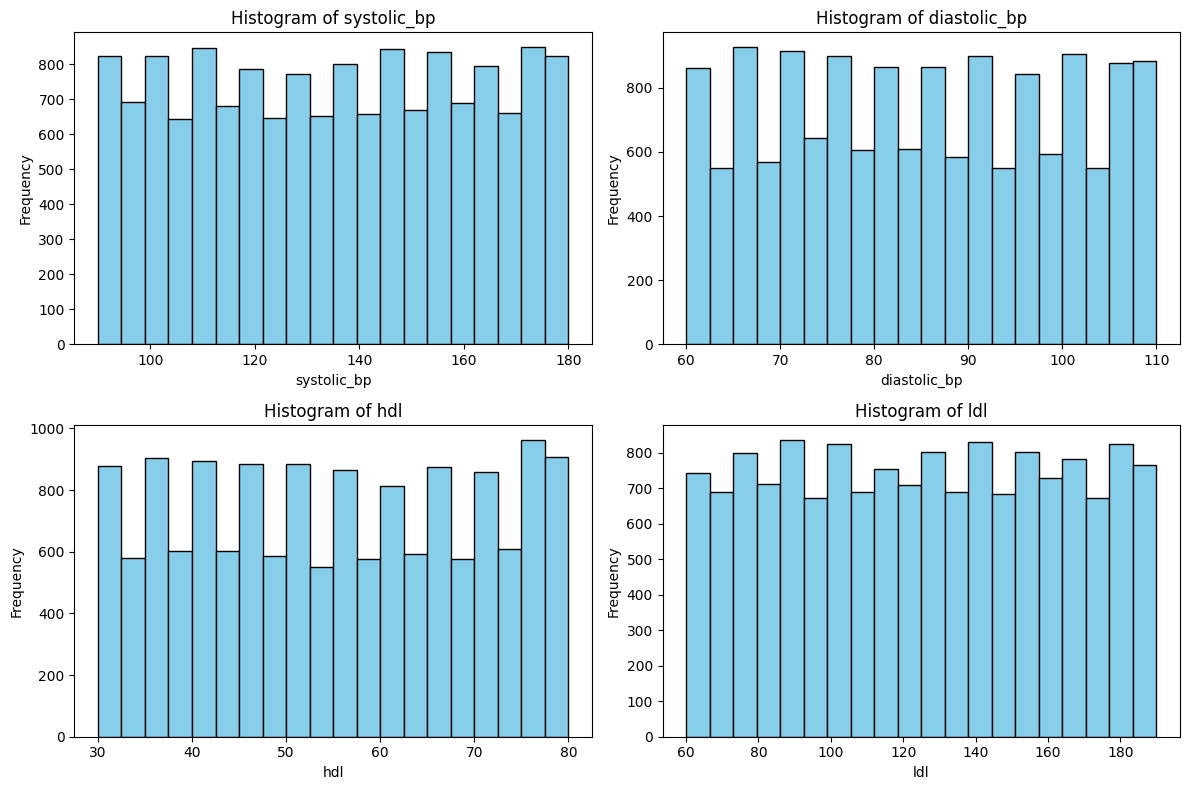

In [11]:
cols_to_plot = ['systolic_bp', 'diastolic_bp', 'hdl','ldl']

#Histograms
plt.figure(figsize=(12,8))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col], bins=20, color="skyblue", edgecolor="black")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()